<h1>About this Exercise</h1>

This tutorial will provide you with enough information to finish CIS537 projects that use [PyTorch](https://pytorch.org/) but it is not meant to be a comprehensive tutorial for PyTorch. For a complete tutorial on Pytorch, review PyTorch's official tutorial:
https://pytorch.org/tutorials/

<h3>What is PyTorch?</h3>

PyTorch is a python-based deep learning platform that provides GPU support. To start, first import the PyTorch packages and some of its some packages.

In [1]:
# import PyTorch and its subpackages
import torch
import torch.nn as nn
from torch.nn import functional as F

# Also other packages for convenience
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/codio/workspace/.modules')
import helper as h

<h3>0. Tensors</h3>

Tensors are the basic building blocks of PyTorch. They are similar to NumPy's ndarrays. For example, to create a tensor of all zeros with size (3, 2), you can do the following:

In [2]:
X = torch.zeros(3, 2) # this syntax is similar to NumPy. In Numpy, we would do np.zeros((3,2))

print(X)
print(X.shape)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
torch.Size([3, 2])


You can also convert a NumPy array to a torch Tensor: 

In [3]:
X_numpy = np.arange(15)
print('NumPy Array: ', X_numpy)

X_tensor = torch.tensor(X_numpy)
print('Pytorch Tensor: ', X_tensor)

NumPy Array:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Pytorch Tensor:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])


You can also convert a torch Tensor to a NumPy array

In [4]:
X_tensor_numpy = X_tensor.numpy()

print(X_tensor_numpy)
print(type(X_tensor_numpy))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
<class 'numpy.ndarray'>


Just like NumPy, you can do arithmetic operations on torch Tensor

In [10]:
# Create two numpy arrays
A = np.array([1, 2, 3])
B = np.array([1, 5, 6])

# Convert the two numpy arrays into torch Tensor
A_tensor = torch.Tensor(A)
B_tensor = torch.Tensor(B)

# addition / subtraction
print('Addition in Numpy', A + B)
print('Addition in PyTorch', A_tensor + B_tensor)
print()

# scalar multiplication
print('Scalar Multiplication in Numpy', 3*A)
print('Scalar Multiplication in PyTorch', 3*A_tensor)
print()

# elementwise multiplication
print('Elementwise Multiplication in Numpy', A*B)
print('Elementiwse Multiplication in PyTorch', A_tensor*B_tensor)
print()

# matrix multiplication
# this is slightly different from NumPy
print('Matrix Multiplication in Numpy', A@B)
print('Matrix Multiplication in PyTorch', torch.matmul(A_tensor, B_tensor))
print()

Addition in Numpy [2 7 9]
Addition in PyTorch tensor([2., 7., 9.])

Scalar Multiplication in Numpy [3 6 9]
Scalar Multiplication in PyTorch tensor([3., 6., 9.])

Elementwise Multiplication in Numpy [ 1 10 18]
Elementiwse Multiplication in PyTorch tensor([ 1., 10., 18.])

Matrix Multiplication in Numpy 29
Matrix Multiplication in PyTorch tensor(29.)



Some other useful tensor operations:

In [11]:
# Elementwise comparison
print('Elementwise Comparison in NumPy: ', A == B)
print('Elementwise omparison in PyTorch: ', A_tensor == B_tensor)
print()

# Generate a random matrix
C = np.array([[10, 9, 8], [6, 7, 5], [1, 2, 3]])
C_tensor = torch.Tensor(C)

print('C', C)
print()

# Sum along the row
# In NumPy, we specify the axis.
# In PyTorch, we specify the dim
print('Sum along row (down) in NumPy: ', np.sum(C, axis=0))
print('Sum along row (down) in PyTorch: ' ,torch.sum(C_tensor, dim=0))
print()

# Find the mean along the column
# In NumPy, we specify the axis.
# In PyTorch, we specify the dim
print('Mean along column (across) in NumPy: ', np.mean(C, axis=1))
print('Mean along column (across) in PyTorch: ', torch.mean(C_tensor, dim=1))
print()


# Find the argmax along the column
# In NumPy, we specify the axis.
# In PyTorch, we specify the dim
print('argmax along column (across) in NumPy: ', np.argmax(C, axis=1))
print('argmax along column (across) in PyTorch: ', torch.argmax(C_tensor, dim=1))
print()

Elementwise Comparison in NumPy:  [ True False False]
Elementwise omparison in PyTorch:  tensor([ True, False, False])

C [[10  9  8]
 [ 6  7  5]
 [ 1  2  3]]

Sum along row (down) in NumPy:  [17 18 16]
Sum along row (down) in PyTorch:  tensor([17., 18., 16.])

Mean along column (across) in NumPy:  [9. 6. 2.]
Mean along column (across) in PyTorch:  tensor([9., 6., 2.])

argmax along column (across) in NumPy:  [0 1 2]
argmax along column (across) in PyTorch:  tensor([0, 1, 2])



<h3>1. Creating a model</h3>

In the following sections, we are going to develop a multilayer perceptron for our favorite spiral dataset. To start, let's generate and visualize the dataset. 

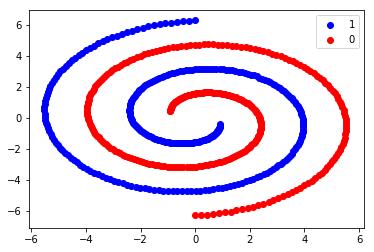

In [12]:
# Running the following code with generate
# 600 datapoints
# 300 in class 0 
# 300 in class 1
X, y = h.spiraldata(N=300)

h.visualize_2D(X.numpy(), y.numpy())

Now, we will create a multilayer perceptron. In Pytorch, to create a model, we need to create a model class that overloads <code>nn.Module</code> and implement the <code>forward()</code> function that performs forward propagation.

In [13]:
# create a model class named MLP
# overloads nn.Module 

# This MLP is a simple multilayer perceptron with 3-hidden layers 
# with ReLU transition function
class MLP(nn.Module):
    def __init__(self):
        # call the constructor of the inherited module
        # this line is always necessary
        super().__init__()
        
        # All the layers with trainable parameters have to be 
        # defined in the constructor
        # Create a linear layer that takes input of dimension 2
        # and outputs a vector of dimension 64
        # Similarly, create the consequent layers
        self.fc1 = nn.Linear(in_features=2, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=16)
        
        # The last layer should output a two dimensional vector
        # where the first dimension corresponds to the network's
        # belief that the input belongs to class 0
        # and similarly, second dimension corresponds to class 1
        self.fc4 = nn.Linear(in_features=16, out_features=2)
        
    def forward(self, x):
        # apply the first linear transformation to input x
        # then apply the ReLU transition to get the output
        # of the first hidden layer o1
        # Similar procedures are done to get o2, o3
        o1 = F.relu(self.fc1(x))
        o2 = F.relu(self.fc2(o1))
        o3 = F.relu(self.fc3(o2))
        
        # We do not apply any transition function to the output
        # of the final hidden layer
        o4 = self.fc4(o3)
        return o4

Now, we can instantiate a model and do forward propagation by running the following cell: 

In [14]:
# Instantiate a model
model = MLP()

# Run forward propagation
logits = model(X)

# Print the output of the model
# This should be (600, 2)
print(logits.shape)

torch.Size([600, 2])


<h3>2. Define a loss function</h3>

To train a neural network, we need a loss function. Since we are doing a classification problem, we are going to use the cross entropy loss. Luckily, Pytorch has implemented this for us. For a comprehensive list of PyTorch implemented loss function, please check out: https://pytorch.org/docs/1.1.0/nn.html#loss-functions

In [15]:
# create the cross entropy loss function
# this loss function takes in logits and labels and return the loss value
# Concretely, loss_fn(logits, y) returns the cross entropy loss between
# the prediction and ground truth
loss_fn = nn.CrossEntropyLoss()

<h3>3. Define an optimizer </h3>
We are going to use an SGD optimizer to optimize our MLP. Conveniently, PyTorch has implemented SGD for us. 

In [ ]:
# torch.optim.SGD is the optimizer that PyTorch implemented
# it takes the model's parameter, which you can get by calling
# model.parameters()
# and learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

<h3>4. Training the Network </h3>

With all the ingredients we have, we are ready to train our multilayer perceptrons.

In [ ]:
# Num_epochs is the number we are going to go through the dataset
# This is a simple dataset so we are just going to do a vanilla Gradient Descent
# rather than minibatch Stochastic Gradient Descent
num_epochs = 2000

losses = []
for epoch in range(num_epochs):
    # Set the model to training mode
    # This step is always necessary during training 
    model.train()
    
    # PyTorch keeps track of all the gradients generated 
    # throughout the whole training procedure
    # But we only need the gradient of the current time step
    # so we need to zero-out the gradient buffer
    optimizer.zero_grad()
    
    # Do forward propagation
    logits = model(X)
    
    # Calculate the loss 
    loss = loss_fn(logits, y)
    
    # Do backward propagation
    loss.backward()
    
    # Update the model parameters 
    optimizer.step()
    
    # Get the prediction
    prediction = torch.argmax(logits, dim=1)
    
    # PyTorch supports elements elementwise comparison
    acc = torch.mean((prediction == y).float())
    
    losses.append(loss.item())
    
    # print the loss value every 50 epochs
    if (epoch + 1) % 50 == 0:
        print('Epoch [{}/ {}], Loss: {:.4f} '.format(epoch + 1, num_epochs, losses[-1]))

In [ ]:
# Plot the training loss
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.show()

<h3>5. Evaluate the Network </h3>

In [ ]:
# Need to go into eval mode
model.eval()

# Do a forward pass and tell PyTorch to not keep track of
# the gradient calculation to save memory
with torch.no_grad():
    logits = model(X)

# make prediction
prediction = torch.argmax(logits, dim=1)

# Calculate the accracuy
print('Accuracy: {:.2f}%'.format(torch.mean((prediction == y).float()).item() * 100))

In [ ]:
# visualize the model
h.visclassifier(model, X.numpy(), y.numpy())

<h3>(Optional) Exercise</h3>

In the following cell, you will create another multilayer perceptron with 2 hidden layers. The first hidden layer has 256 neurons and the second hidden layer has 128 neurons. We have provided the following code stub. What you need to is to fill in the blanks. 

In [ ]:
class MLP_v2(nn.Module):
    def __init__(self):
        # call the constructor of the inherited module
        # this line is always necessary
        super().__init__()
        
        # TODO: fill in the blank with the right layer
        self.fc1 = None
        self.fc2 = None
        self.fc3 = None
        
        ### BEGIN SOLUTION
        self.fc1 = nn.Linear(in_features=2, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=2)
        ### END SOLUTION
        
    def forward(self, x):
        o1 = F.relu(self.fc1(x))
        o2 = F.relu(self.fc2(o1))
        o3 = self.fc3(o2)
        return o3

In [ ]:
model_v2 = MLP_v2()

# If you create the right model, you should be able to pass the following test

# Checking the size of the parameters in the first layer
fc1_parameters = list(model_v2.fc1.parameters())

# the weight should have size (256, 2)
assert fc1_parameters[0].shape == (256, 2)
# the bias should have size (256, )
assert fc1_parameters[1].shape == (256, )

# Checking the size of the parameters in the second layer
fc2_parameters = list(model_v2.fc2.parameters())
assert fc2_parameters[0].shape == (128, 256)
assert fc2_parameters[1].shape == (128, )

# Checking the size of the parameters in the last layer
fc3_parameters = list(model_v2.fc3.parameters())
assert fc3_parameters[0].shape == (2, 128)
assert fc3_parameters[1].shape == (2, )

In [ ]:
# creating a new optimizer
# Feel free to play around with the learning rate
optimizer_v2 = torch.optim.SGD(model_v2.parameters(), lr=0.1)

In [ ]:
# Train the model
num_epochs = 2000

losses = []
for epoch in range(num_epochs):
    # Set the model to training mode
    # This step is always necessary during training 
    model_v2.train()
    
    # PyTorch keeps track of all the gradients generated 
    # throughout the whole training procedure
    # But we only need the gradient of the current time step
    # so we need to zero-out the gradient buffer
    optimizer_v2.zero_grad()
    
    # Do forward propagation
    logits = model_v2(X)
    
    # Calculate the loss 
    loss = loss_fn(logits, y)
    
    # Do backward propagation
    loss.backward()
    
    # Update the model parameters 
    optimizer_v2.step()
    
    # Get the prediction
    prediction = torch.argmax(logits, dim=1)
    
    # PyTorch supports elements elementwise comparison
    acc = torch.mean((prediction == y).float())
    
    losses.append(loss.item())
    
    # print the loss value every 50 epochs
    if (epoch + 1) % 50 == 0:
        print('Epoch [{}/ {}], Loss: {:.4f} '.format(epoch + 1, num_epochs, losses[-1]))

In [ ]:
# Evaluate the model
# Need to go into eval mode
model_v2.eval()

# Do a forward pass and tell PyTorch to not keep track of
# the gradient calculation to save memory
with torch.no_grad():
    logits = model_v2(X)

# make prediction
prediction = torch.argmax(logits, dim=1)

# Calculate the accracuy
print('Accuracy: {:.2f}%'.format(torch.mean((prediction == y).float()).item() * 100))

In [ ]:
# visualize the model
h.visclassifier(model_v2, X.numpy(), y.numpy())

### Tensorflow approach

With Tensorflow, you can follow the simple 5 steps to train your model on data

Like in Pytorch, first you define your network with layers. However, unlike in Pytorch, the model definition in Tensorflow also defines the exact forward propagation. In other words, Tensorflow automatically attaches the layers for you whereas Pytorch requires you to define a `forward` method for forward propagation. The latter approach has both an upside and a downside: gives the user more flexibility but demands repetitive work.

With Tensorflow's `compile` and `fit` methods, you can easily and cleanly perform training. Again, Pytorch provides the user more flexibility by requiring them to write the training/evaluation step in a Python-ic way. On the other hand, Tensorflow provides in-built functions that conveniently connect to `compile` and `fit`. 

[Tensorflow's recent versions provide more control on the training step like Pytorch.](https://www.tensorflow.org/tutorials/quickstart/advanced)

In [ ]:
import tensorflow as tf

### Training the v1 model in Tensorflow

1. Creating a model
2. Define a loss function
3. Define an optimizer
4. Training the Network

Notes:
- We use the `SparseCategoricalCrossentropy` loss function since the true `y` is a vector of are binary labels of shape `len(data)` and the logit outputs of the model is a matrix of logits of shape `len(data), 2`. Since the outputs are not normalized between 0 and 1, we specify `from_logits=True`.
- By default, Tensorflow outputs loss and metrics at the end of every epoch. We use a custom logger function to only output every 50 epochs.

In [ ]:
X_np = X.numpy()
y_np = y.numpy()

## Creating a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(64, activation='relu', name='fc1'),
    tf.keras.layers.Dense(32, activation='relu', name='fc2'),
    tf.keras.layers.Dense(16, activation='relu', name='fc3'),
    tf.keras.layers.Dense(2, activation=None, name='fc4'),
])

# Display the model's parameters
model.summary()

## Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Define an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

## Training the network
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
history = model.fit(
    X_np,
    y_np,
    epochs=num_epochs,
    verbose=0, # disable the default progress bar
    callbacks=[h.ProgBarLoggerNEpochs(num_epochs, every_n=50)],
)

`model.summary()` is an incredibly useful tool. It also shows the number of parameters per layer. 

For example, since the first layer is $64$ units and the input dimension is $2$, the first weight matrix $\mathbf{W}_1$ must be of shape $2 \times 64$. Recall that $\mathbf{Z}_1 = \sigma(\mathbf{W}_1 \mathbf{x} + \mathbf{b})$ where $\mathbf{x}$ is one input point and $\mathbf{b}$ is the bias vector added after matrix multiplication of $\mathbf{W}_1$ with $\mathbf{x}$. To match dimensions, the vectors $\mathbf{b}$ and $\mathbf{W}_1 \mathbf{x}$ must be of equal length, i.e., $64$. Hence, how many parameters does the first layer have in total?

Well, it is $2 \times 64 + 64 = 192$, which we see in the summary table. Likewise, the second layer has $64 \times 32 + 32 = 2080$ parameters, and so on.

In [ ]:
training_losses = history.history['loss']

plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.show()

5. Evaluate the Network

In [ ]:
## Evaluate the Network
model.evaluate(X_np, y_np)

## OR
print('Calculating accuracy in Tensorflow manually with logits')

# get logits
logits = model(X_np)

# make prediction
prediction = tf.argmax(logits, axis=1)

# Calculate the accuracy
accuracy = tf.reduce_mean(tf.cast(prediction == y, tf.float32)).numpy()
print('Accuracy: {:.2f}%'.format(accuracy * 100))

In [ ]:
# visualize the model
h.visclassifier_tf(model, X_np, y_np)